# Exercício 5 - SME0130 - Redes Complexas

### Aluno: Luciano Augusto Campagnoli da Silva
### Número USP: 9313367

Importar bibliotecas.

In [74]:
from numpy  import *
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

np.random.seed(100)

## Questão 1

Gerar grafo aleatório no modelo Barabási-Albert.

In [75]:
N = 1000
av_degree = 8
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

Distribuição de grau.

In [76]:
def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [77]:
ks, Pk = degree_distribution(GBA)

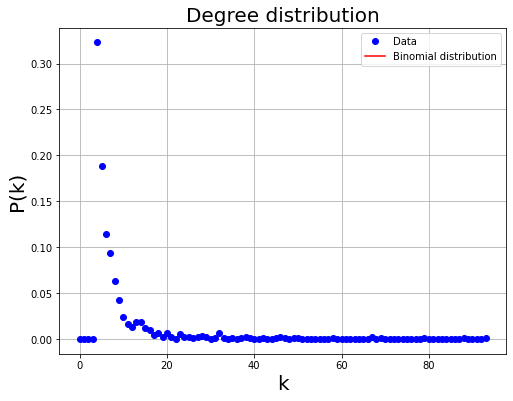

In [78]:
plt.figure(figsize=(8,6))
plt.plot(ks,Pk,'bo', label='Data')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file

## Fitting of. binomial distribution
from scipy.stats import binom
pk = binom.pmf(ks, N, m)
plt.plot(ks, pk, 'r', label='Binomial distribution')
plt.legend()
plt.show(True)

Segundo momento de distribuição de grau.

In [32]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [33]:
k2 = momment_of_degree_distribution(GBA,2)
print('Second momment of P(k):', k2)

Second momment of P(k): 134.556


Coeficiente de aglomeração médio.

In [34]:
avc = nx.average_clustering(GBA)
print("Average clustering:", "%3.4f"%avc, '|p = ', m)

Average clustering: 0.0337 |p =  4


Alternativa correta: **b**.

## Questão 2

Rede aleatória Erdos-Reyni.

In [36]:
N = 1000
av_degree = 10
p = av_degree/ (N - 1)

GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

Rede aleatória Barabási-Albert.

In [37]:
N = 1000
av_degree = 10
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

Entropia de Shannon.

In [38]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [39]:
H = shannon_entropy(GER)
print("Shannon Entropy ER = ", "%3.4f"%H)

Shannon Entropy ER =  3.6961


In [40]:
H = shannon_entropy(GBA)
print("Shannon Entropy BA = ", "%3.4f"%H)

Shannon Entropy BA =  3.5694


Alternativa correta: **e**.

## Questões 3

Rede Barabási-Albert.

In [61]:
N = 1000
av_degree = 10
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

Grau dos vértices.

In [62]:
degree = dict(nx.degree(GBA))
print("Degree: ", degree)

Degree:  {0: 41, 1: 35, 2: 30, 3: 46, 4: 93, 5: 145, 6: 57, 7: 120, 8: 62, 9: 127, 10: 53, 11: 42, 12: 60, 13: 80, 14: 66, 15: 27, 16: 73, 17: 45, 18: 40, 19: 55, 20: 49, 21: 30, 22: 14, 23: 55, 24: 30, 25: 41, 26: 21, 27: 19, 28: 34, 29: 29, 30: 18, 31: 25, 32: 45, 33: 15, 34: 21, 35: 13, 36: 39, 37: 24, 38: 19, 39: 31, 40: 24, 41: 19, 42: 29, 43: 13, 44: 12, 45: 24, 46: 12, 47: 26, 48: 44, 49: 21, 50: 16, 51: 20, 52: 28, 53: 14, 54: 13, 55: 54, 56: 28, 57: 12, 58: 16, 59: 15, 60: 36, 61: 31, 62: 20, 63: 17, 64: 19, 65: 22, 66: 18, 67: 15, 68: 27, 69: 19, 70: 29, 71: 11, 72: 19, 73: 28, 74: 13, 75: 14, 76: 15, 77: 10, 78: 22, 79: 9, 80: 9, 81: 17, 82: 15, 83: 26, 84: 29, 85: 15, 86: 18, 87: 23, 88: 12, 89: 9, 90: 20, 91: 19, 92: 28, 93: 18, 94: 26, 95: 21, 96: 20, 97: 11, 98: 10, 99: 41, 100: 18, 101: 24, 102: 20, 103: 21, 104: 14, 105: 13, 106: 13, 107: 17, 108: 19, 109: 7, 110: 15, 111: 10, 112: 12, 113: 12, 114: 10, 115: 10, 116: 16, 117: 18, 118: 18, 119: 9, 120: 8, 121: 17, 122: 

Centralidade de autovetor.

In [63]:
EC = dict(nx.eigenvector_centrality(GBA, max_iter = 1000))
print('Eigenvetor centrality:', EC)

Eigenvetor centrality: {0: 0.07773629241789257, 1: 0.06895630762471486, 2: 0.06947366646404089, 3: 0.09123833997501314, 4: 0.18349523872561185, 5: 0.3192552924083956, 6: 0.1494766154427826, 7: 0.2582013712524717, 8: 0.13655633728770628, 9: 0.27151829230584085, 10: 0.1298038789232071, 11: 0.09933021071762227, 12: 0.13510234685735117, 13: 0.1675116791212648, 14: 0.13120204299295946, 15: 0.0791781634210682, 16: 0.14830643862718806, 17: 0.09056759036728548, 18: 0.08469255244567352, 19: 0.11003105459606244, 20: 0.07328906850030407, 21: 0.060632210557647184, 22: 0.0506684780306424, 23: 0.10712636387256017, 24: 0.07343918665097869, 25: 0.0891935368334665, 26: 0.0616943475539151, 27: 0.0506210044132012, 28: 0.07817769458611058, 29: 0.07417917818239926, 30: 0.041021280335225334, 31: 0.04819711686981851, 32: 0.0684504483114302, 33: 0.038700981357902675, 34: 0.06814134645594673, 35: 0.049322188544229414, 36: 0.07854043668301915, 37: 0.05016791376168794, 38: 0.04127713067009841, 39: 0.061907748389

Coeficiente de correlação de Pearson.

In [64]:
degree_list = list(degree.values())
EC_list = list(EC.values())

# calculate Pearson's correlation
corr, _ = stats.pearsonr(degree_list,EC_list)
print("Pearson correlation: ", corr)

Pearson correlation:  0.93713684391832


Alternativa correta: **d**.

## Questão 4

Rede Barabási-Albert.

In [70]:
N = 500
av_degree = 10
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

Grau dos vértices.

In [71]:
degree = dict(nx.degree(GBA))
print("Degree: ", degree)

Degree:  {0: 17, 1: 36, 2: 28, 3: 13, 4: 29, 5: 65, 6: 98, 7: 73, 8: 45, 9: 32, 10: 48, 11: 17, 12: 45, 13: 69, 14: 28, 15: 29, 16: 23, 17: 44, 18: 29, 19: 27, 20: 25, 21: 30, 22: 45, 23: 19, 24: 15, 25: 17, 26: 19, 27: 15, 28: 30, 29: 10, 30: 24, 31: 24, 32: 17, 33: 16, 34: 19, 35: 22, 36: 22, 37: 23, 38: 35, 39: 18, 40: 19, 41: 30, 42: 23, 43: 19, 44: 17, 45: 12, 46: 18, 47: 14, 48: 12, 49: 11, 50: 11, 51: 16, 52: 22, 53: 19, 54: 11, 55: 21, 56: 8, 57: 8, 58: 23, 59: 21, 60: 16, 61: 33, 62: 10, 63: 13, 64: 16, 65: 21, 66: 11, 67: 19, 68: 19, 69: 17, 70: 13, 71: 26, 72: 8, 73: 15, 74: 8, 75: 13, 76: 13, 77: 20, 78: 12, 79: 12, 80: 18, 81: 19, 82: 10, 83: 16, 84: 10, 85: 9, 86: 7, 87: 8, 88: 10, 89: 8, 90: 13, 91: 19, 92: 13, 93: 9, 94: 7, 95: 11, 96: 11, 97: 20, 98: 18, 99: 13, 100: 10, 101: 16, 102: 11, 103: 10, 104: 9, 105: 7, 106: 8, 107: 9, 108: 7, 109: 9, 110: 7, 111: 9, 112: 14, 113: 15, 114: 7, 115: 10, 116: 9, 117: 12, 118: 8, 119: 5, 120: 10, 121: 15, 122: 22, 123: 12, 124: 9

Centralidade intersticial dos vértices.

In [72]:
BC = dict(nx.betweenness_centrality(GBA))
print("Betweeness centrality: ", BC)

Betweeness centrality:  {0: 0.006274852707140657, 1: 0.027450186283339457, 2: 0.02112506787700962, 3: 0.004014408541385416, 4: 0.017943578420663926, 5: 0.07069425126873996, 6: 0.1418022397972977, 7: 0.08966175859014776, 8: 0.039959697345314744, 9: 0.022677150936778512, 10: 0.04223685693974711, 11: 0.006048624563958692, 12: 0.03976132446454575, 13: 0.07816310560790987, 14: 0.01751576870617847, 15: 0.018663661445689553, 16: 0.012924895139067706, 17: 0.038180100395799915, 18: 0.018327754388676468, 19: 0.015460222149643592, 20: 0.01299324503969802, 21: 0.022309272247906048, 22: 0.036204491274555065, 23: 0.007299821424887365, 24: 0.004416040424906463, 25: 0.0065794626358715615, 26: 0.009005622577670793, 27: 0.007211207402089918, 28: 0.020179454086305254, 29: 0.0012059942499077657, 30: 0.013557665762574478, 31: 0.01390860114537398, 32: 0.006717829557923819, 33: 0.004910122032243381, 34: 0.00894278903293485, 35: 0.008787013887546742, 36: 0.010107406117368876, 37: 0.00941839453253896, 38: 0.02

Coeficiente de correlação de Pearson.

In [73]:
degree_list = list(degree.values())
BC_list = list(BC.values())

# calculate Pearson's correlation
corr, _ = stats.pearsonr(degree_list, BC_list)
print("Pearson correlation: ", corr)

Pearson correlation:  0.9449591058206543


Alternativa correta: **d**.

# Questão 5

Rede feita segundo modelo de configuração.

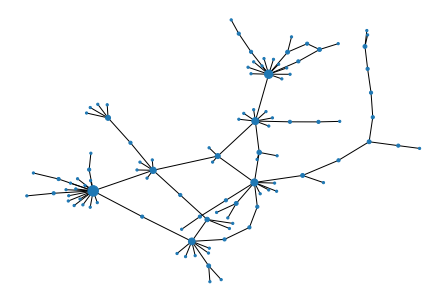

In [42]:
from random import randint
np.random.seed(42)

N = 500
a = 3
seq = np.random.zipf(a, N) #Zipf distribution

#seq = np.random.poisson(10, N) #Poisson distribution

#print(seq)

if(sum(seq)%2 != 0): # the sum of stubs have to be even
    pos = randint(0, len(seq))
    seq[pos] = seq[pos]+ 1

#print(sum(seq))
G = nx.configuration_model(seq)

#get the largest component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
d = dict(G.degree())

nx.draw(G, nodelist=d.keys(), node_size=[v * 5 for v in d.values()])
plt.show()

Segundo momento da distribuição de grau.

In [43]:
k2 = momment_of_degree_distribution(G,2)
print('Second momment of P(k):', k2)

Second momment of P(k): 12.392523364485982


Alternativa correta: **b**.